# Trabajo Practico Laboratorio 1
## Nicolas Pereyra

| $\alpha$Max [dB] | $\alpha$mín [dB] | fc [kHz] |fs [kHz]  |
|-----------|-----------|----------|----------|
|     1     |     20    |    4.2   |1.2        |

En este trabajo practico se nos pidio un filtro Chebyshev pasa Altos de segundo orden utilizando el CI [UAF42](https://www.ti.com/lit/ds/symlink/uaf42.pdf?ts=1653513515595&ref_url=https%253A%252F%252Fwww.ti.com%252Fproduct%252FUAF42%253Futm_source%253Dsupplyframe%2526utm_medium%253DSEP%2526utm_campaign%253Dnot_alldatasheet%2526DCM%253Dyes%2526dclid%253DCOTE4LXH-_cCFaCFlQIdQoELbA). Este filtro sera calculado, simulado, tanto en Python como en Ltspice, para luego el dia del laboratorio evaluarlo y comparar su rendimiento ideal con uno real.


## Desarrollo del diseño del circuito:
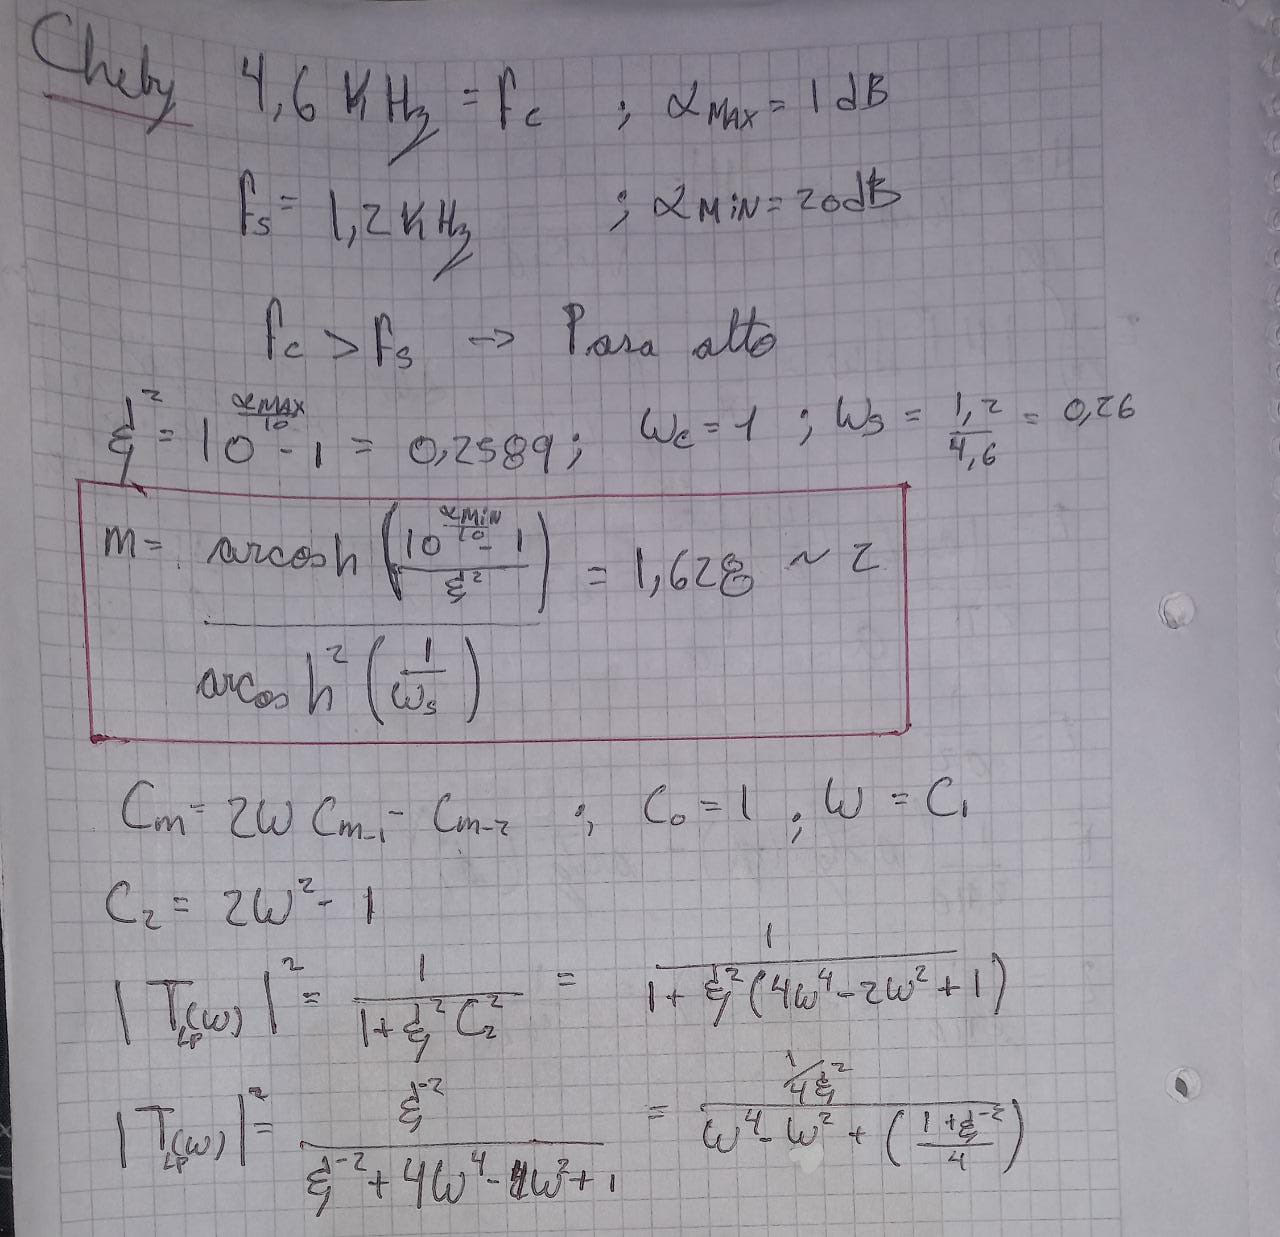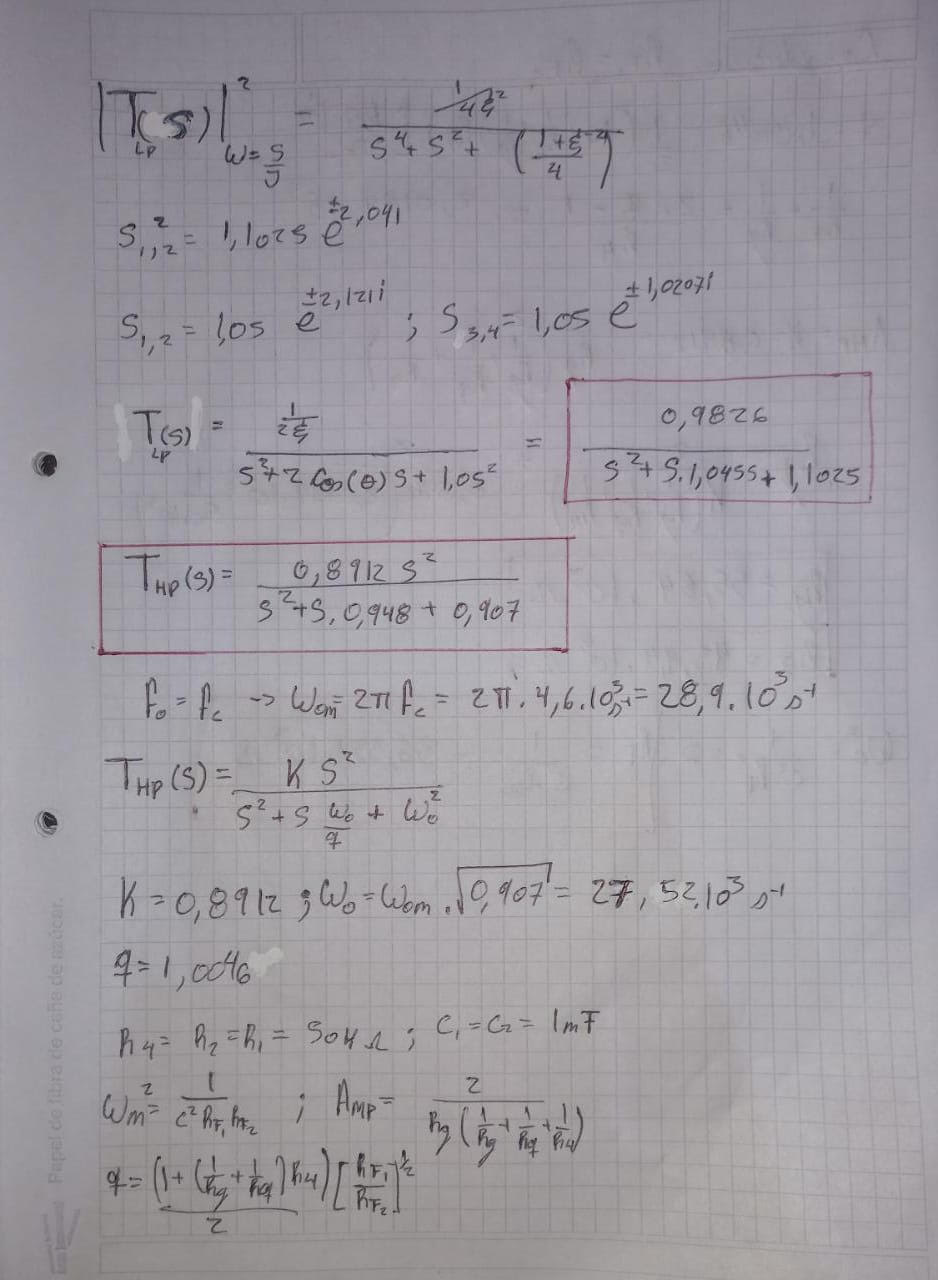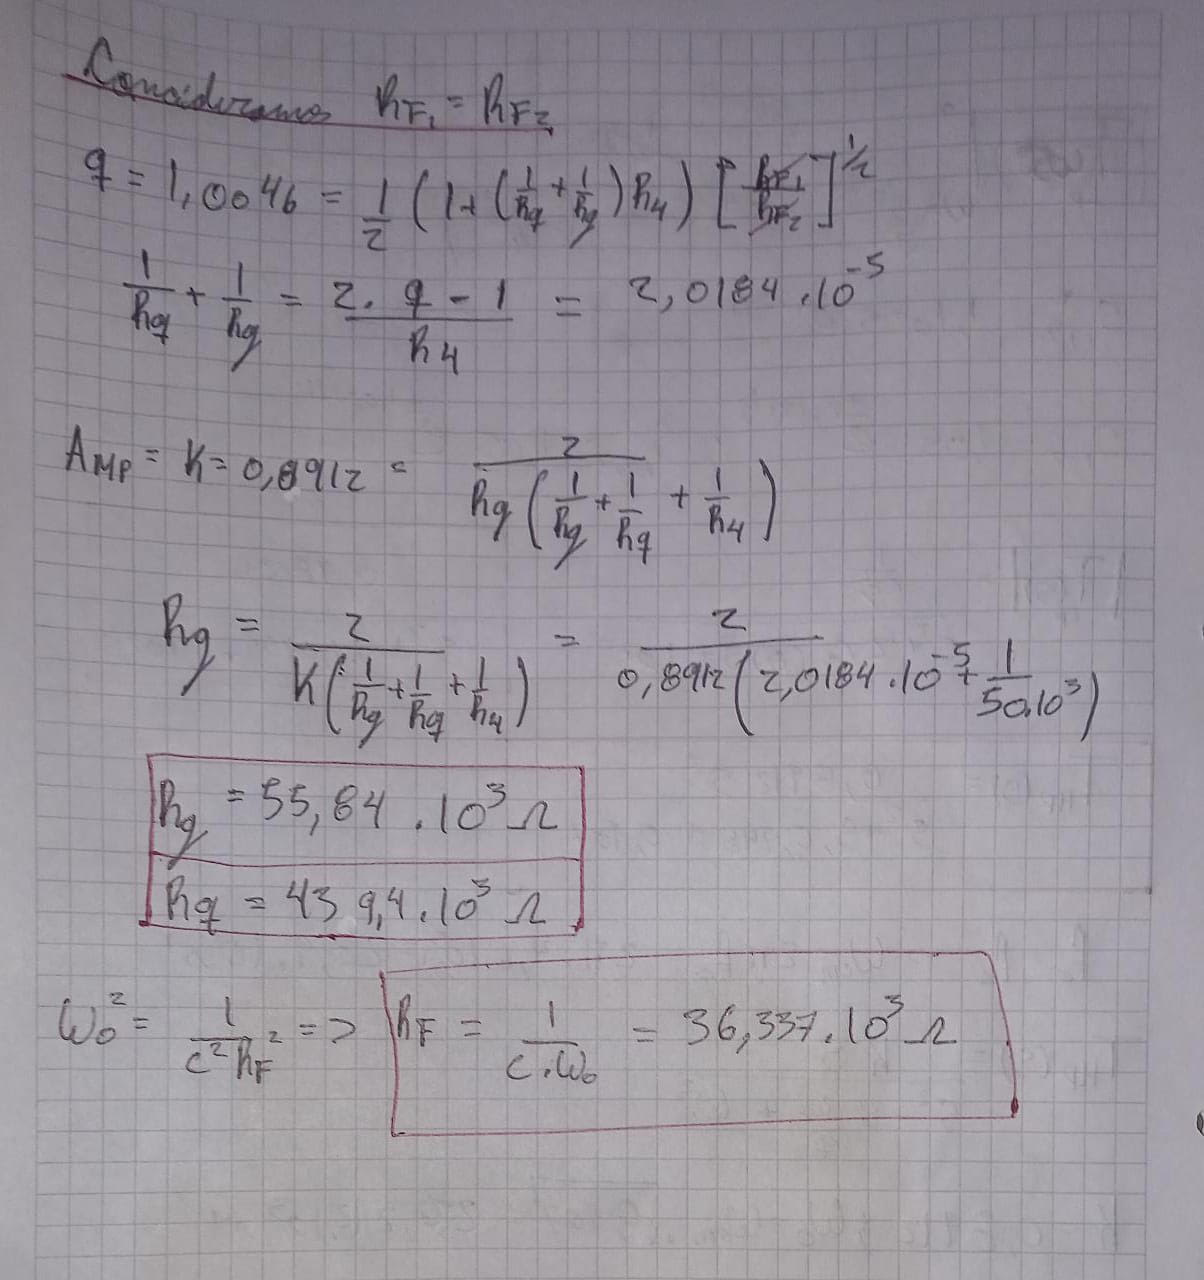

## Desarrolo del circuito con Python:

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

atemin = 1 # dB
n = 2 # Orden
wo = 1 # fc

## Pasa bajos normalizado
[z_lp, p_lp, k_lp] = signal.cheb1ap(n, atemin)
[b_lp, a_lp] = signal.zpk2tf(z_lp, p_lp, k_lp)

filter_lp = tf2sos_analog(b_lp, a_lp)
print_subtitle('Transferencia de filtro pasa Bajos (Normalizado)')
pretty_print_SOS(filter_lp, mode='omegayq')

## La siguiente funcion tiraba error por un problema que se desconoce
## Pasa altos normalizado

[b_hp, a_hp]=signal.lp2hp(b_lp, a_lp)
tf_hp = signal.TransferFunction(b_hp, a_hp)

#filter_hp = tf2sos_analog(b_hp, a_hp)
print_subtitle('Transferencia de filtro pasa Altos (Normalizado)')
#pretty_print_SOS(filter_hp, mode='omegayq')


#### Transferencia de filtro pasa Bajos (Normalizado)

<IPython.core.display.Math object>

#### Transferencia de filtro pasa Altos (Normalizado)

<font size="3"> <p style="text-align: left;">    

$T_{hp}(s)= \frac{0.8912.s²}{s²+s.9956+0.9070}$

## Simulaciones con Python del filtro normalizado:
Devido a que el ripple del filtro es de un valor muy pequeño ($1db$) no se puede apreciar correctamente la "onda" que contiene el filtro en su zona de paso. Esta sera vista de una mejor manera en la simulacion circuital del circuito desnormalizado y la simulacion del circuito desnormalizado.

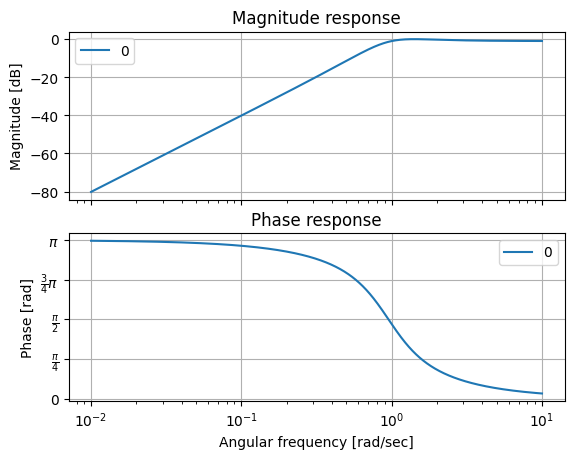

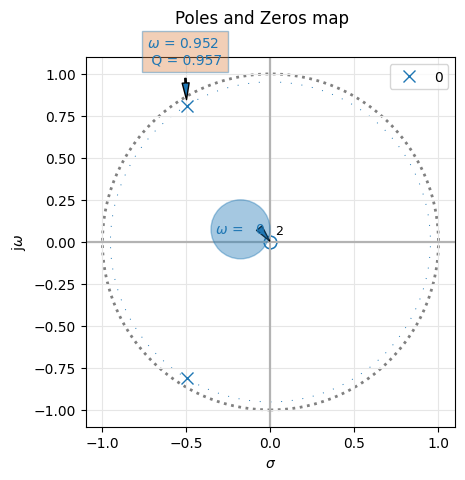

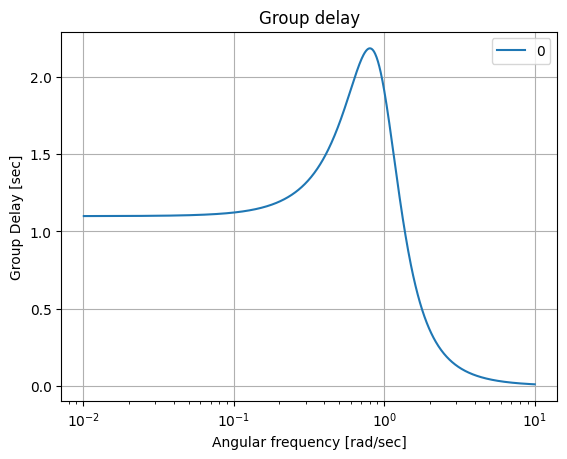

In [24]:
analyze_sys(tf_hp)

### Similaciones filtro desnormalizado Python:

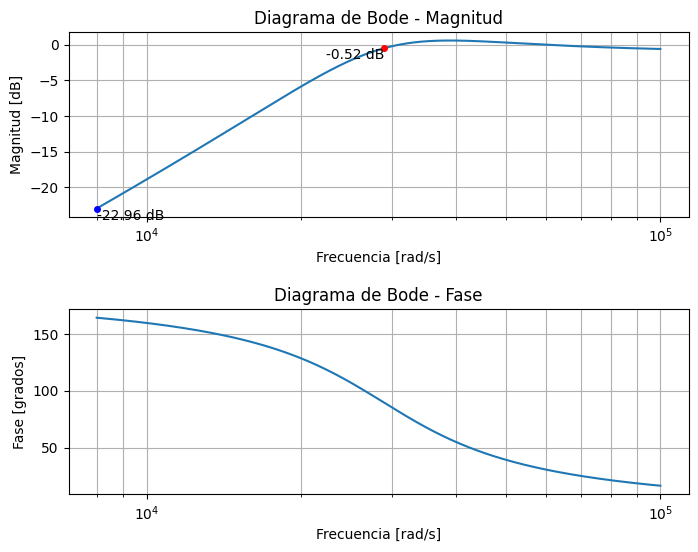

#### Transferencia de filtro pasa altos (Desnormalizado)

<IPython.core.display.Math object>

In [5]:
ws = 2*np.pi*1.2*10**3
wo = 2*np.pi*4.6*10**3
k = 0.8912
wn = (0.9070)**(1/2)
q = wn/0.948

b_hp = [k, 0, 0]
a_hp = [1, wn*wo/q, wo**2]

tf_hp = signal.TransferFunction(b_hp,a_hp)

#--------------------------------------------------------------
## Mantengo graficos de igual tamaño
start_freq = 8*10**3
end_freq = 10**5
frecuencias = np.logspace(np.log10(start_freq), np.log10(end_freq), num=1000)

# Generar el grillado de frecuencias
w, mag, phase = signal.bode(tf_hp,frecuencias)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar fc
idx_1 = np.where(w >= (wo))[0][0]
mag_marker_1 = mag[idx_1]
ax1.plot(w[idx_1], mag[idx_1], 'ro', markersize=4)
ax1.text(w[idx_1], mag[idx_1], f'{mag_marker_1:.2f} dB', ha='right', va='top')

# Marcar fs
idx_2 = np.where(w >= (ws))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'bo', markersize=4)
ax1.text(w[idx_2], mag[idx_2], f'{mag_marker_2:.2f} dB', ha='left', va='top')

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()

###
filter_hp = tf2sos_analog(b_hp, a_hp)
print_subtitle('Transferencia de filtro pasa altos (Desnormalizado)')
pretty_print_SOS(filter_hp, mode='omegayq')

<p style="text-align: center;">    
(punto azul $\Rightarrow fs$ ; punto rojo $\Rightarrow fc$)



Como dijimos anteriormente en estos nuevos graficos desnormalizamos se puede apreciar el pequeño ripple que tienen este filtro chebyshev de segundo orden $2°$. Tambien se pude apreciar que tanto la frecuencia de "stop" como la frecuencia de "corte" cumplen las condiciones dadas.

## Simulacion general Filtro desnormalizado:

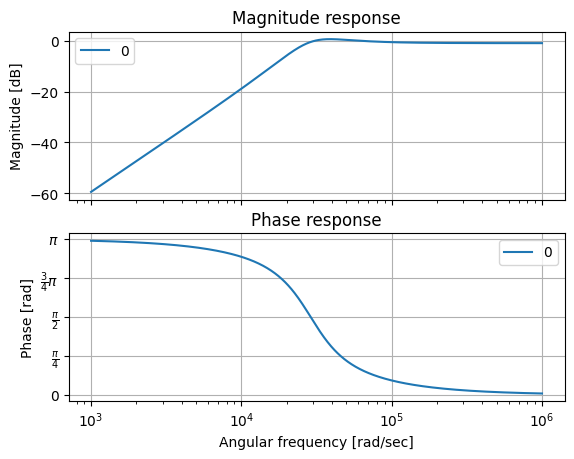

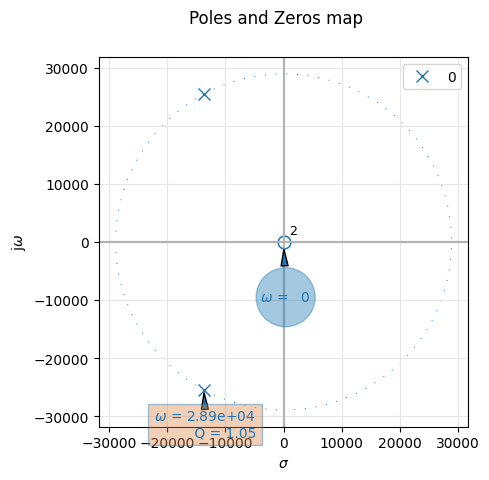

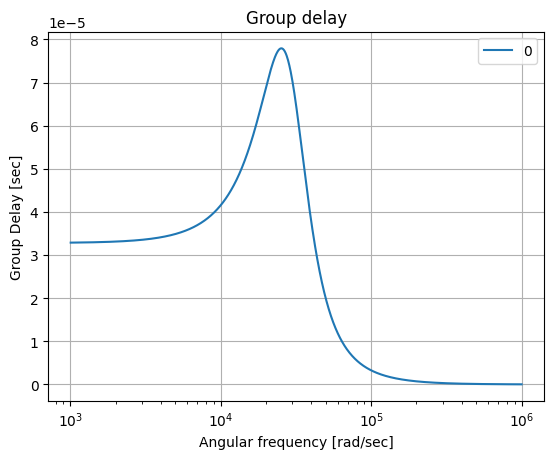

In [67]:
analyze_sys(tf_hp)

## Simulacion LTspice:
Para traer este filtro a la realidad utilizamos el circuito integrado UAF42. Este filtro nos permite crear, pasa bajos, pasa banda o como en nuestro caso pasa altos con capacitores con muy baja tolerancia. Antes de armarlo fisicamente vamos a simular el circuito interno del UAF42 en LTspice utilizando los componentes obtenidos en las primeras al inicio de este tp.
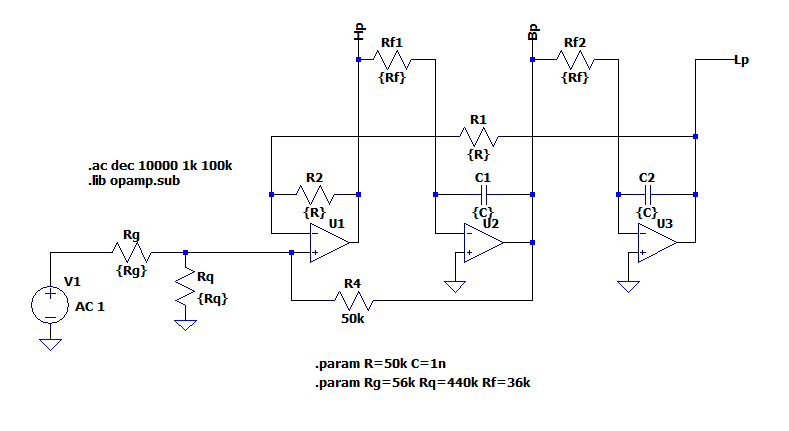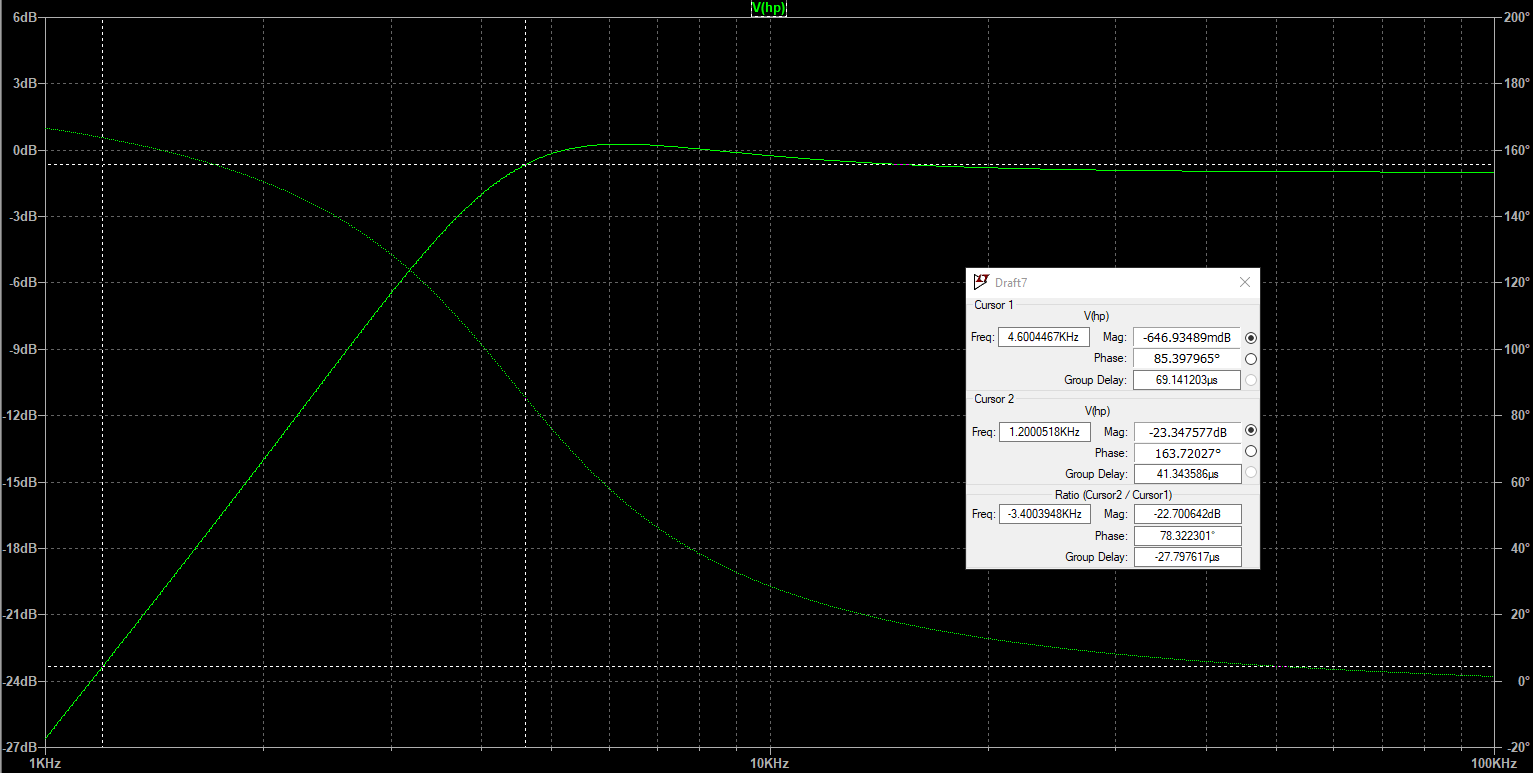

Como se puede observar el circuito obtenido tiene un rendimiento practicamente igual al simulado utilando Python.

# Laboratorio:
## Bom
|Item|Cant|Tag|Description|
|----|----|---|-----------|
|1|1|RG|Resistencia de 56K|
|2|1|RQ|Resistencia de 820K|
|3|1|RF1|Resistencia de 36K|
|4|1|RF2|Resistencia de 36K|
|5|4|R1, R2, R3, R4|Preset ajuste vertical de 2,2K|
|6|1|U1|Amplificador universal integrado|
|7|7|J1, J2, J3, J4, J5, J6, J7|Conector pin Header macho 2x1Conector pin Header macho 2x1|
|8|1|C1|Capacitor electrolitico de 10uF x 25V|
|9|1|C2|Capacitor ceramico de 100nF|

## Circuito:
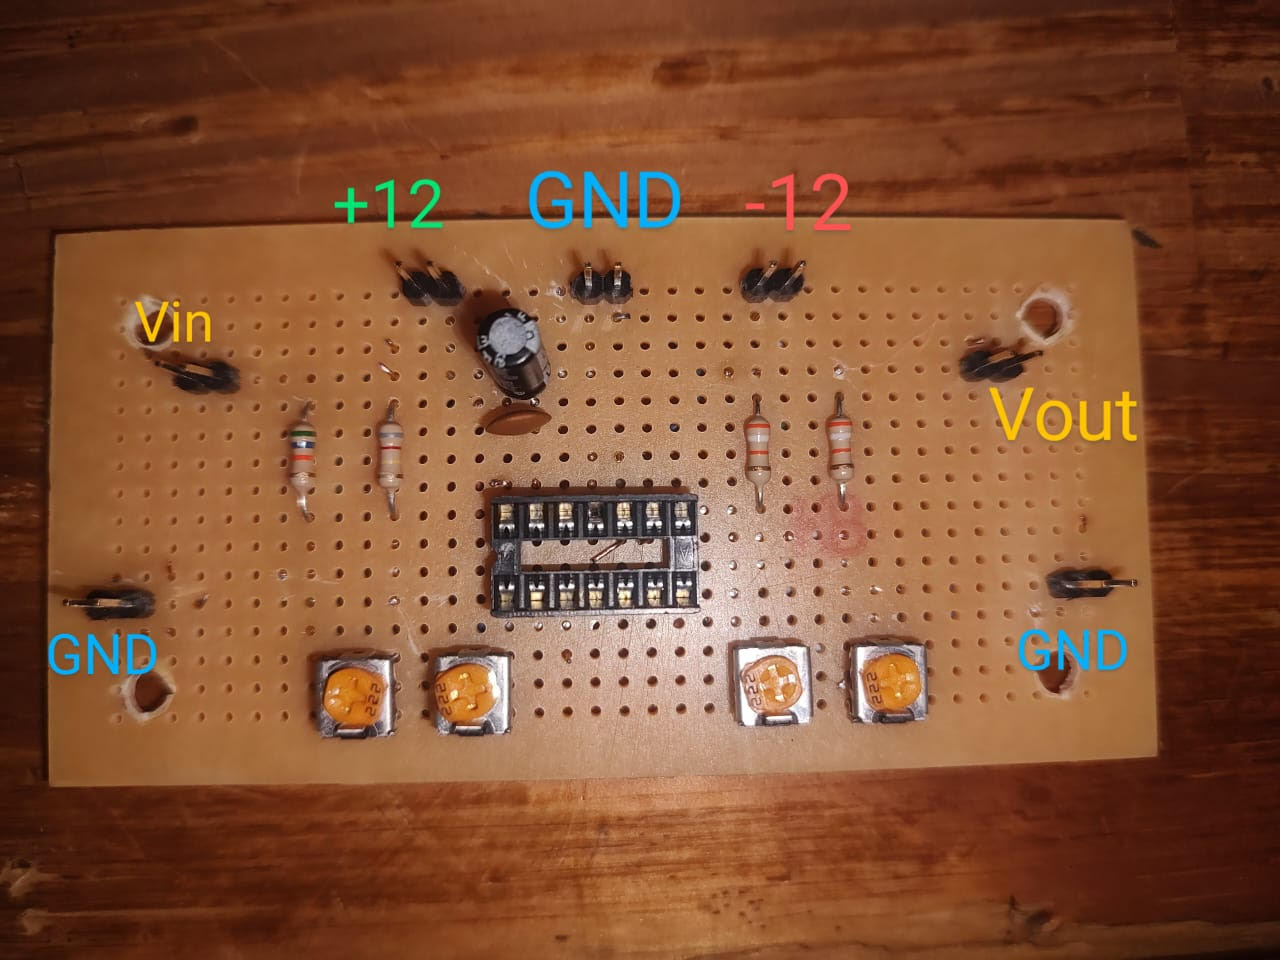

## Graficos obtenidos con el Analizador de Audio:
### Bode:
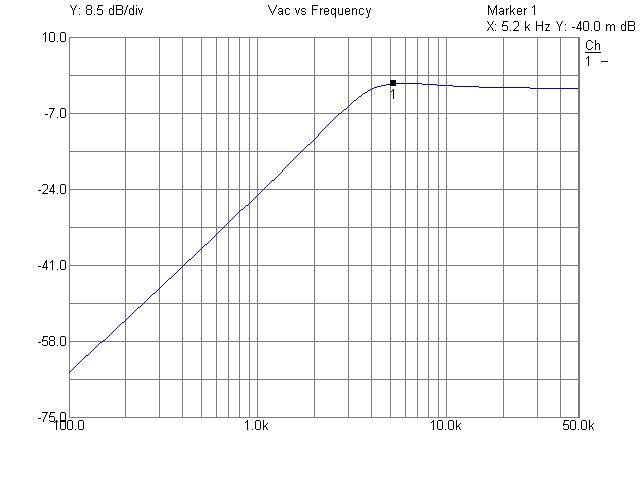
### Fase:
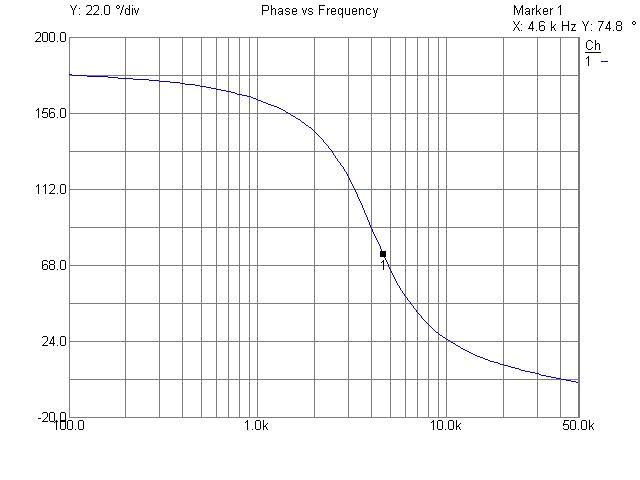
Como se pude observar en los graficos obtenidos de forma experimental con el analizador de audio, el circuito obtenido experimentalmente presenta una respuesta considerablemente similar a la esperada y a la simulado por otros medios, LTspice y Python.

## Obtenido punto a punto
### Bode

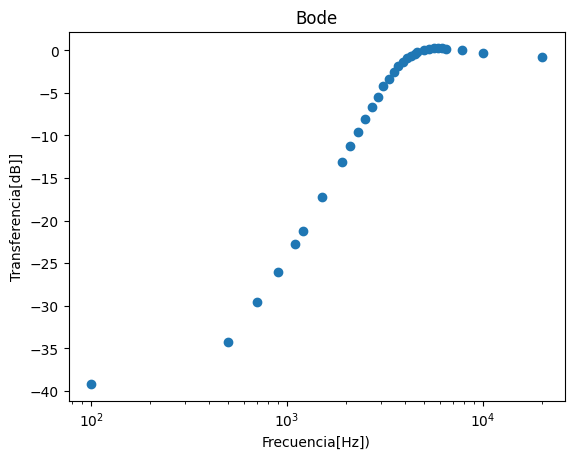

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('muestra.csv')

# Extraer las columnas de los datos
x = df['frec1']
y = df['atenua']

# Crear el gráfico de puntos con eje x logarítmico
plt.scatter(x, y)
plt.xscale('log')  # Configurar el eje x como logarítmico
plt.xlabel('Frecuencia[Hz])')
plt.ylabel('Transferencia[dB]]')
plt.title('Bode')

# Mostrar el gráfico
plt.show()


A diferencia del resto de los graficos simulados anteriormente este tiene una menor cantidad de muestras y un menor rango de frecuencias debido a que el mismo se obtuvo punto a punto. Como se puede observar en el bode obtenido punto a punto este tambia nos da una transferecia con ciertas ondulaciones en la banda de paso haciendonos acordar a un chebyshev, similar a la transferencia obtenida con los otros medios.
### Fase:

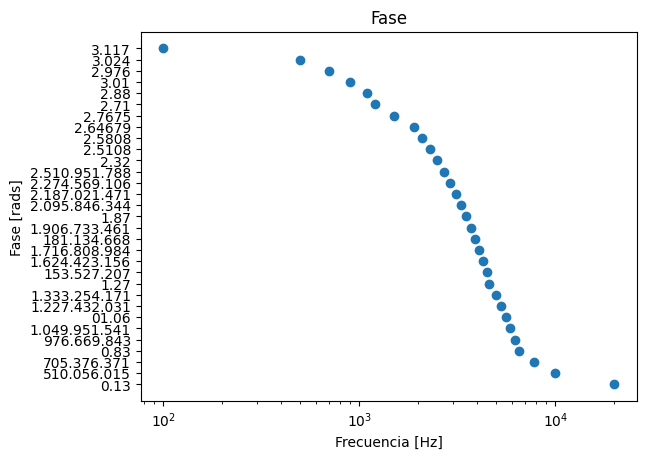

In [31]:
# Extraer las columnas de los datos
x = df['frec1']
y = df['fase']

# Ordenar los datos en orden descendente
sorted_indices = np.argsort(x)[::-1]  # Índices para ordenar en orden descendente
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Crear el gráfico de puntos con eje x logarítmico
plt.scatter(x_sorted, y_sorted)
plt.xscale('log')  # Configurar el eje x como logarítmico
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rads]')
plt.title('Fase')

# Mostrar el gráfico
plt.show()

Los datos utilizados para generar este grafico fueron medidos o aproximamados interpolando los datos experimentalesm, esto se debe a la gran gantidad de señal ruido que tenia la salida, haciendo imposible una medicion. Esta relacion ruido se volvio despresiable a los $900 \text{Hz}$. Se puede apreciar que la fase es siempre negativa y va desde $\pi$ o $180°$ hasta  $0$ al igual que el resto de las simulaciones. Tambien se puede observar que el valor medio del cambio $\pi/2$ se encuentra entre los $3kHz$ y los $4kHz$ al igual que el circuito simulado en Ltspice y Python.
### Retardo:

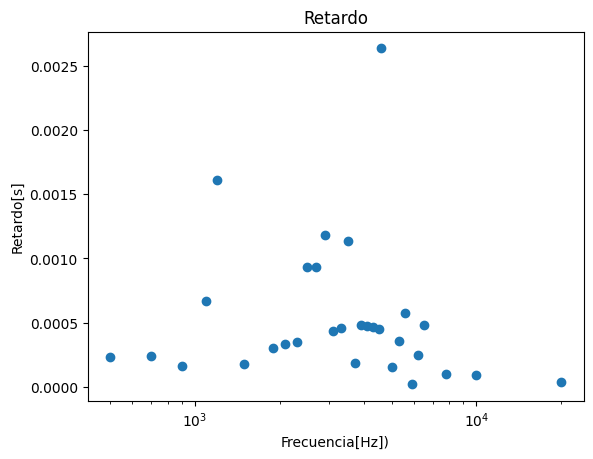

In [32]:
# Extraer las columnas de los datos
x = df['frec2']
y = df['retardo']

# Crear el gráfico de puntos con eje x logarítmico
plt.scatter(x, y)
plt.xscale('log')  # Configurar el eje x como logarítmico
plt.xlabel('Frecuencia[Hz])')
plt.ylabel('Retardo[s]')
plt.title('Retardo')

# Mostrar el gráfico
plt.show()

A diferencia de los gráficos de amplitud y fase, el gráfico de retardo no es tan fácilmente reconocible, pero aún así se pueden apreciar ciertos comportamientos. Es importante tener en cuenta que el gráfico elaborado en Python está en radianes por segundo, mientras que el gráfico punto a punto se desarrolló en hercios. Esto hace que el gráfico punto a punto esté desplazado $2\pi$ veces a la izquierda en comparación con el gráfico de Python.

Al analizar las comparaciones, se puede observar que ambos gráficos presentan un retardo menor en la zona de paso que en la zona de rechazo, aunque esto es más evidente en la simulación de Python. Otra coincidencia que se aprecia en ambos gráficos es un pico de retardo aproximadamente entre los $4\text{ kHz}$ y $5\text{ kHz}$.

Para obtener el retardo se tomo la siguiente formula:
<font size="3"> <p style="text-align: center;">    
$\tau(w)= -\frac{\varDelta \phi}{\varDelta w}$

# Conclucion:
En este trabajo práctico, se logró desarrollar con éxito un filtro pasa bajos Chebyshev y llevarlo a la realidad. Durante el desarrollo, nos encontramos con un obstáculo no considerado en la simulación: el ruido, lo cual nos obligó a comenzar nuestras mediciones a partir de los $900 \text{Hz}$. A pesar de esto, los resultados obtenidos muestran un comportamiento muy similar al simulado tanto en Python como en LTspice.

Específicamente, tanto el diagrama de Bode como la fase obtenidos, ya sea punto a punto o con el analizador de audio, se comportaron de manera bastante similar a lo esperado, con mínimas variaciones. Por otro lado, el retardo obtenido analíticamente se aleja del comportamiento esperado, pero en general, conserva las características más importantes del filtro.

En resumen, a pesar de los desafíos encontrados, el filtro implementado presenta un buen desempeño en comparación con las simulaciones, demostrando un comportamiento consistente con las expectativas.